In [1]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = os.path.join('data', 'Batting.csv')
batters = pd.read_csv(file)
batters.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [3]:
file = os.path.join('data', 'People.csv')
people = pd.read_csv(file)
people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [4]:
people2 = people[['playerID', 'birthYear']]
people2.head()

,playerID,birthYear
0,aardsda01,1981.0
1,aaronha01,1934.0
2,aaronto01,1939.0
3,aasedo01,1954.0
4,abadan01,1972.0


In [5]:
batters2 = batters[batters.yearID >= 1900]
batters2.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
7915,allenbo01,1900,1,CIN,NL,5,15,0,2,1,...,1.0,0.0,NaN,0,4.0,NaN,1.0,0.0,NaN,NaN
7916,baileha01,1900,1,BSN,NL,4,9,2,2,0,...,1.0,0.0,NaN,0,2.0,NaN,0.0,0.0,NaN,NaN
7917,barreji01,1900,1,CIN,NL,137,545,114,172,11,...,42.0,44.0,NaN,72,63.0,NaN,5.0,10.0,NaN,NaN
7918,barrysh01,1900,1,BSN,NL,81,254,40,66,10,...,37.0,9.0,NaN,13,16.0,NaN,2.0,8.0,NaN,NaN
7919,beaumgi01,1900,1,PIT,NL,138,567,105,158,14,...,50.0,27.0,NaN,40,34.0,NaN,4.0,21.0,NaN,NaN


In [6]:
combined = batters2.groupby(['playerID','yearID'], as_index=False).sum()
combined.head()

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2004,1,11,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2006,1,45,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,2007,1,25,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2008,1,47,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2009,1,73,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
yearly = batters2.groupby(['yearID'], as_index=False).sum()
yearly.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1900,202,10874,39132,5932,10925,1432,607,254,4924.0,1686.0,0.0,3034,2681.0,0.0,513.0,806.0,0.0,0.0
1,1901,454,20872,77105,11073,20957,2931,1238,455,9136.0,2851.0,0.0,5465,0.0,0.0,830.0,1672.0,0.0,0.0
2,1902,526,20916,76157,9879,20318,2830,983,356,8245.0,2678.0,0.0,5435,0.0,0.0,712.0,1832.0,0.0,0.0
3,1903,433,21128,75439,9888,19776,3034,1161,335,8144.0,2735.0,0.0,5369,0.0,0.0,729.0,2019.0,0.0,0.0
4,1904,458,23564,82488,9302,20363,2851,1154,331,7590.0,2780.0,0.0,5580,0.0,0.0,777.0,2219.0,0.0,0.0


In [8]:
yearly['S%'] = (yearly['H']-yearly['2B']-yearly['3B']-yearly['HR'])/yearly['AB']
yearly['2B%'] = yearly['2B']/yearly['AB']
yearly['3B%'] = yearly['3B']/yearly['AB']
yearly['HR%'] = yearly['HR']/yearly['AB']
yearly['BB%'] = yearly['BB']/(yearly['AB']+yearly['BB'])
yearly['K%'] = yearly['SO']/yearly['AB']
yearly['SB%'] = yearly['SB']/(yearly['SB']+yearly['CS'])
yearly.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,SH,SF,GIDP,S%,2B%,3B%,HR%,BB%,K%,SB%
0,1900,202,10874,39132,5932,10925,1432,607,254,4924.0,...,806.0,0.0,0.0,0.220587,0.036594,0.015512,0.006491,0.071954,0.068512,1.0
1,1901,454,20872,77105,11073,20957,2931,1238,455,9136.0,...,1672.0,0.0,0.0,0.211828,0.038013,0.016056,0.005901,0.066186,0.000000,1.0
2,1902,526,20916,76157,9879,20318,2830,983,356,8245.0,...,1832.0,0.0,0.0,0.212049,0.037160,0.012908,0.004675,0.066612,0.000000,1.0
3,1903,433,21128,75439,9888,19776,3034,1161,335,8144.0,...,2019.0,0.0,0.0,0.202097,0.040218,0.015390,0.004441,0.066441,0.000000,1.0
4,1904,458,23564,82488,9302,20363,2851,1154,331,7590.0,...,2219.0,0.0,0.0,0.194295,0.034563,0.013990,0.004013,0.063360,0.000000,1.0


In [9]:
yearly = yearly.set_index('yearID')

In [10]:
yearly.loc[[1998],['HR%']].values[0][0]

0.030302304985758394

In [11]:
total = batters2.sum()
total['G']

4977926

In [12]:
total['S%'] = (total['H']-total['2B']-total['3B']-total['HR'])/total['AB']
total['2B%'] = total['2B']/total['AB']
total['3B%'] = total['3B']/total['AB']
total['HR%'] = total['HR']/total['AB']
total['BB%'] = total['BB']/(total['AB']+total['BB'])
total['K%'] = total['SO']/total['AB']
total['SB%'] = total['SB']/(total['SB']+total['CS'])
total

playerID    allenbo01baileha01barreji01barrysh01beaumgi01b...
yearID                                              190058292
stint                                                  103761
teamID      CINBSNCINBSNPITCINNY1PHINY1CHNCINCHNSLNSLNCHNN...
lgID        NLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNL...
G                                                     4977926
AB                                                   13312337
R                                                     1721342
H                                                     3479414
2B                                                     600945
3B                                                     111106
HR                                                     286507
RBI                                                1.5926e+06
SB                                                     249865
CS                                                      97480
BB                                                    1255915
SO      

In [ ]:
total

In [47]:
ABpG = total['AB']/total['G']
avgG = total['yearID']/total['G']
avgSB = total['SB%']
avgG

38.180216419448584

In [13]:
combined = combined.drop(columns=['stint'])
combined.head()

,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2004,11,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2006,45,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,2007,25,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2008,47,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2009,73,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
merged = combined.merge(people2, how='inner', on = 'playerID')
merged.head()

,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,birthYear
0,aardsda01,2004,11,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0
1,aardsda01,2006,45,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1981.0
2,aardsda01,2007,25,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0
3,aardsda01,2008,47,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1981.0
4,aardsda01,2009,73,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0


In [15]:
merged['Age'] = merged['yearID']-merged['birthYear']
merged.head()

,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,birthYear,Age
0,aardsda01,2004,11,0,0,0,0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0,23.0
1,aardsda01,2006,45,2,0,0,0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1981.0,25.0
2,aardsda01,2007,25,0,0,0,0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0,26.0
3,aardsda01,2008,47,1,0,0,0,0,0,0.0,...,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1981.0,27.0
4,aardsda01,2009,73,0,0,0,0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0,28.0


In [16]:
merged['PA'] = merged['AB'] + merged['BB'] + merged['HBP'] + merged['SH'] + merged['SF']
merged.head()

,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,...,BB,SO,IBB,HBP,SH,SF,GIDP,birthYear,Age,PA
0,aardsda01,2004,11,0,0,0,0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0,23.0,0.0
1,aardsda01,2006,45,2,0,0,0,0,0,0.0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1981.0,25.0,3.0
2,aardsda01,2007,25,0,0,0,0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0,26.0,0.0
3,aardsda01,2008,47,1,0,0,0,0,0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1981.0,27.0,1.0
4,aardsda01,2009,73,0,0,0,0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0,28.0,0.0


In [37]:
merged2 = merged[merged.PA >= 434]
merged2.head()

,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,...,BB,SO,IBB,HBP,SH,SF,GIDP,birthYear,Age,PA
9,aaronha01,1954,122,468,58,131,27,6,13,69.0,...,28,39.0,0.0,3.0,6.0,4.0,13.0,1934.0,20.0,509.0
10,aaronha01,1955,153,602,105,189,37,9,27,106.0,...,49,61.0,5.0,3.0,7.0,4.0,20.0,1934.0,21.0,665.0
11,aaronha01,1956,153,609,106,200,34,14,26,92.0,...,37,54.0,6.0,2.0,5.0,7.0,21.0,1934.0,22.0,660.0
12,aaronha01,1957,151,615,118,198,27,6,44,132.0,...,57,58.0,15.0,0.0,0.0,3.0,13.0,1934.0,23.0,675.0
13,aaronha01,1958,153,601,109,196,34,4,30,95.0,...,59,49.0,16.0,1.0,0.0,3.0,21.0,1934.0,24.0,664.0


In [38]:
merged2['S%'] = (merged2['H']-merged2['2B']-merged2['3B']-merged2['HR'])/merged2['PA']
merged2['2B%'] = merged2['2B']/merged2['PA']
merged2['3B%'] = merged2['3B']/merged2['PA']
merged2['HR%'] = merged2['HR']/merged2['PA']
merged2['BB%'] = merged2['BB']/merged2['PA']
merged2['K%'] = merged2['SO']/merged2['PA']
merged2['SB%'] = merged2['SB']/(merged2['SB']+merged2['CS'])
merged2.head()

C:\Users\ben16\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ben16\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ben16\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,...,birthYear,Age,PA,S%,2B%,3B%,HR%,BB%,K%,SB%
9,aaronha01,1954,122,468,58,131,27,6,13,69.0,...,1934.0,20.0,509.0,0.166994,0.053045,0.011788,0.025540,0.055010,0.076621,0.500000
10,aaronha01,1955,153,602,105,189,37,9,27,106.0,...,1934.0,21.0,665.0,0.174436,0.055639,0.013534,0.040602,0.073684,0.091729,0.750000
11,aaronha01,1956,153,609,106,200,34,14,26,92.0,...,1934.0,22.0,660.0,0.190909,0.051515,0.021212,0.039394,0.056061,0.081818,0.333333
12,aaronha01,1957,151,615,118,198,27,6,44,132.0,...,1934.0,23.0,675.0,0.179259,0.040000,0.008889,0.065185,0.084444,0.085926,0.500000
13,aaronha01,1958,153,601,109,196,34,4,30,95.0,...,1934.0,24.0,664.0,0.192771,0.051205,0.006024,0.045181,0.088855,0.073795,0.800000


In [39]:
y = merged2['playerID'].tolist()
z = np.unique(y)
len(z)

3074

In [40]:
dS = []
d2B = []
d3B = []
dHR = []
dBB = []
dK = []
dSB = []
age = []
stats = ['S%', '2B%', '3B%', 'HR%', 'BB%', 'K%', 'SB%']
dstats = {'S%': dS, '2B%': d2B, '3B%': d3B, 'HR%': dHR, 'BB%': dBB, 'K%': dK, 'SB%': dSB}
m = 0
for player in z:
    m +=1
    n = 0
    temp = merged2[merged2.playerID == player]
    for i in stats:
        stat = []
        peak = []
        for index, row in temp.iterrows():
            stat.append(row[i])
            if n == 0:
                age.append(row['Age'])
        n +=1
        sd = np.std(stat)
        mean = np.mean(stat)
        most = max(stat)
        for j in stat:
            if j >= most - 2*sd:
                peak.append(j)
            pmean = np.mean(stat)
        for k in stat:
            dstats[i].append(k-pmean)
    if m % 500 == 0:
        print(m)

500
1000
1500
2000
2500
3000


In [ ]:
merged2[merged2.playerID == 'aaronha01']

In [48]:
avgG = np.mean(merged2['G'])
avgAB = np.mean(merged2['AB'])
avgPA = np.mean(merged2['PA'])

In [42]:
ageDF = pd.DataFrame(age, columns=['Age'])
ageDF.head(10)

,Age
0,20.0
1,21.0
2,22.0
3,23.0
4,24.0
5,25.0
6,26.0
7,27.0
8,28.0
9,29.0


In [43]:
ageDF['1B'] = dS
ageDF['2B'] = d2B
ageDF['3B'] = d3B
ageDF['HR'] = dHR
ageDF['BB'] = dBB
ageDF['K'] = dK
ageDF['SB'] = dSB
ageDF.head(10)

,Age,1B,2B,3B,HR,BB,K,SB
0,20.0,0.002238,0.008352,0.004568,-0.029236,-0.046549,-0.022406,-0.188643
1,21.0,0.009680,0.010945,0.006314,-0.014175,-0.027874,-0.007297,0.061357
2,22.0,0.026153,0.006822,0.013992,-0.015383,-0.045498,-0.017208,-0.355310
3,23.0,0.014503,-0.004694,0.001669,0.010408,-0.017114,-0.013101,-0.188643
4,24.0,0.028015,0.006511,-0.001196,-0.009596,-0.012703,-0.025231,0.111357
5,25.0,0.024277,0.021684,0.002881,0.001500,-0.027966,-0.021104,0.311357
6,26.0,-0.012648,-0.014573,0.009346,0.005464,-0.011197,-0.004147,0.007009
7,27.0,0.005139,0.013429,0.007683,-0.004106,-0.018101,-0.003646,0.011357
8,28.0,0.003160,-0.002715,0.001775,0.012690,-0.002608,0.010419,-0.006825
9,29.0,0.008913,-0.004077,-0.001618,0.006848,0.007685,0.032626,0.172468


In [44]:
agesDF = ageDF.groupby(['Age'], as_index=False).mean()
agesDF.head(10)

,Age,1B,2B,3B,HR,BB,K,SB
0,19.0,0.003098,-0.002313,0.001608,-0.005225,-0.029036,0.000659,-0.065873
1,20.0,0.003661,-0.003262,0.000880,-0.007633,-0.015165,0.009343,-0.034077
2,21.0,0.005650,-0.002027,0.002112,-0.004604,-0.015826,0.006348,-0.017295
3,22.0,0.000840,-0.001039,0.001135,-0.003003,-0.010342,0.006738,0.030409
4,23.0,0.002097,-0.000593,0.001809,-0.001325,-0.006883,0.003593,0.015740
5,24.0,0.001862,0.000153,0.001142,-0.001101,-0.004728,0.000202,0.009572
6,25.0,0.001859,0.000169,0.000864,-0.000300,-0.002965,0.000255,0.004725
7,26.0,0.001265,0.000442,0.001009,0.000147,-0.001184,-0.000568,0.005374
8,27.0,0.001661,0.000511,0.000426,0.000414,-0.000758,-0.001375,0.007496
9,28.0,-0.000562,0.000532,0.000335,0.000464,0.000877,-0.001825,0.009669


In [81]:
ageDF.groupby(['Age'], as_index=False).count()
countAge = ageDF.groupby(['Age'], as_index=False).count()['1B']
countAge

0        5
1       27
2      109
3      293
4      587
5      826
6     1203
7     1389
8     1513
9     1544
10    1428
11    1342
12    1191
13     969
14     810
15     663
16     472
17     340
18     228
19     134
20      87
21      61
22      21
23      13
24       4
25       3
Name: 1B, dtype: int64

In [51]:
agesDF2 = agesDF['Age']
agesDF2['1B'] = (total['S%'] + agesDF['1B']) * avgPA
agesDF2['2B'] = (total['2B%'] + agesDF['2B']) *avgPA
agesDF2['3B'] = (total['3B%'] + agesDF['3B']) *avgPA
agesDF2['HR'] = (total['HR%'] + agesDF['HR']) *avgPA
agesDF2['BB'] = (total['BB%'] + agesDF['BB']) *avgPA
agesDF2['K'] = (total['K%'] + agesDF['K']) *avgPA
agesDF2['SB'] = agesDF['SB']+avgSB
agesDF2.head(10)

0    19
1    20
2    21
3    22
4    23
5    24
6    25
7    26
8    27
9    28
Name: Age, dtype: object

In [52]:
agesDF['Single'] = (total['S%'] + agesDF['1B']) * avgPA
agesDF['Double'] = (total['2B%'] + agesDF['2B']) *avgPA
agesDF['Triple'] = (total['3B%'] + agesDF['3B']) *avgPA
agesDF['Homeruns'] = (total['HR%'] + agesDF['HR']) *avgPA
agesDF['Walks'] = (total['BB%'] + agesDF['BB']) *avgPA
agesDF['Strikeouts'] = (total['K%'] + agesDF['K']) *avgPA
agesDF['SB%'] = agesDF['SB'] + avgSB
agesDF.head()

,Age,1B,2B,3B,HR,BB,K,SB,Single,Double,Triple,Homeruns,Walks,Strikeouts,SB%
0,19.0,0.003098,-0.002313,0.001608,-0.005225,-0.029036,0.000659,-0.065873,109.301813,24.709295,5.742622,9.401928,32.984456,83.481706,0.653484
1,20.0,0.003661,-0.003262,0.000880,-0.007633,-0.015165,0.009343,-0.034077,109.626716,24.161903,5.322693,8.012992,40.986932,88.491935,0.685280
2,21.0,0.005650,-0.002027,0.002112,-0.004604,-0.015826,0.006348,-0.017295,110.774459,24.874396,6.033803,9.760404,40.605560,86.763735,0.702061
3,22.0,0.000840,-0.001039,0.001135,-0.003003,-0.010342,0.006738,0.030409,107.999096,25.444103,5.470172,10.683883,43.769450,86.989266,0.749766
4,23.0,0.002097,-0.000593,0.001809,-0.001325,-0.006883,0.003593,0.015740,108.724601,25.701742,5.858604,11.652051,45.765342,85.174792,0.735097


In [82]:
agesDF['Count'] = countAge
agesDF.head()

,Age,1B,2B,3B,HR,BB,K,SB,Single,Double,Triple,Homeruns,Walks,Strikeouts,SB%,Count
0,19.0,0.003098,-0.002313,0.001608,-0.005225,-0.029036,0.000659,-0.065873,109.301813,24.709295,5.742622,9.401928,32.984456,83.481706,0.653484,5
1,20.0,0.003661,-0.003262,0.000880,-0.007633,-0.015165,0.009343,-0.034077,109.626716,24.161903,5.322693,8.012992,40.986932,88.491935,0.685280,27
2,21.0,0.005650,-0.002027,0.002112,-0.004604,-0.015826,0.006348,-0.017295,110.774459,24.874396,6.033803,9.760404,40.605560,86.763735,0.702061,109
3,22.0,0.000840,-0.001039,0.001135,-0.003003,-0.010342,0.006738,0.030409,107.999096,25.444103,5.470172,10.683883,43.769450,86.989266,0.749766,293
4,23.0,0.002097,-0.000593,0.001809,-0.001325,-0.006883,0.003593,0.015740,108.724601,25.701742,5.858604,11.652051,45.765342,85.174792,0.735097,587


In [ ]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x='Age',y='Strikeouts', data=agesDF, ax=ax)
plt.title('HR vs Age')

Text(0.5,1,'Singles vs Age')

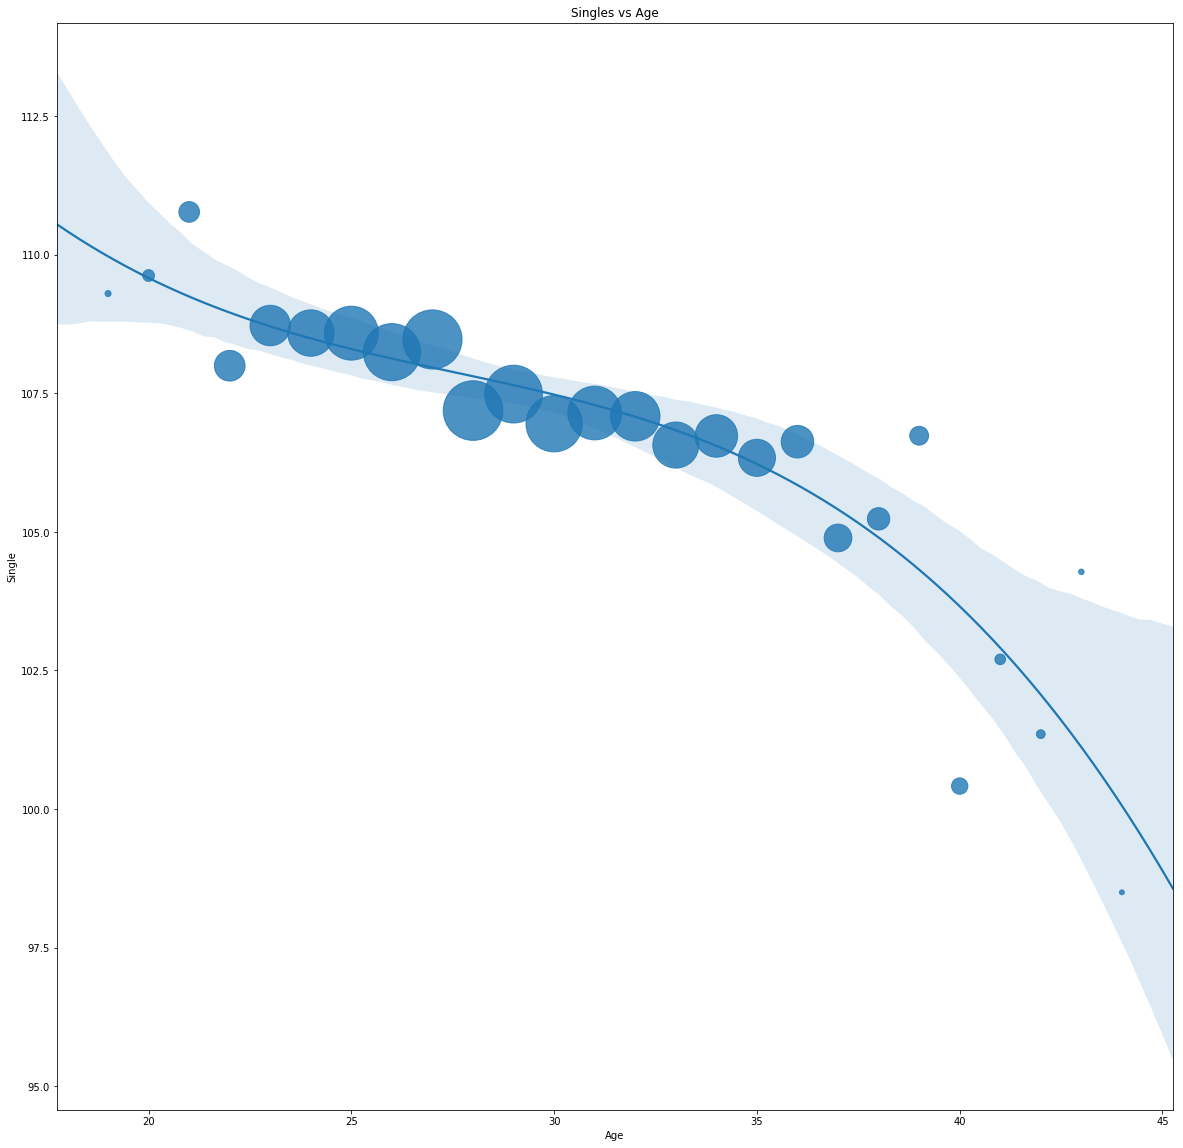

In [169]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x='Age',y='Single', data=agesDF, ax=ax,scatter_kws={"s": 10*agesDF['Count']**(4/5)},order=3)
plt.title('Singles vs Age')

Text(0.5,1,'Doubles vs Age')

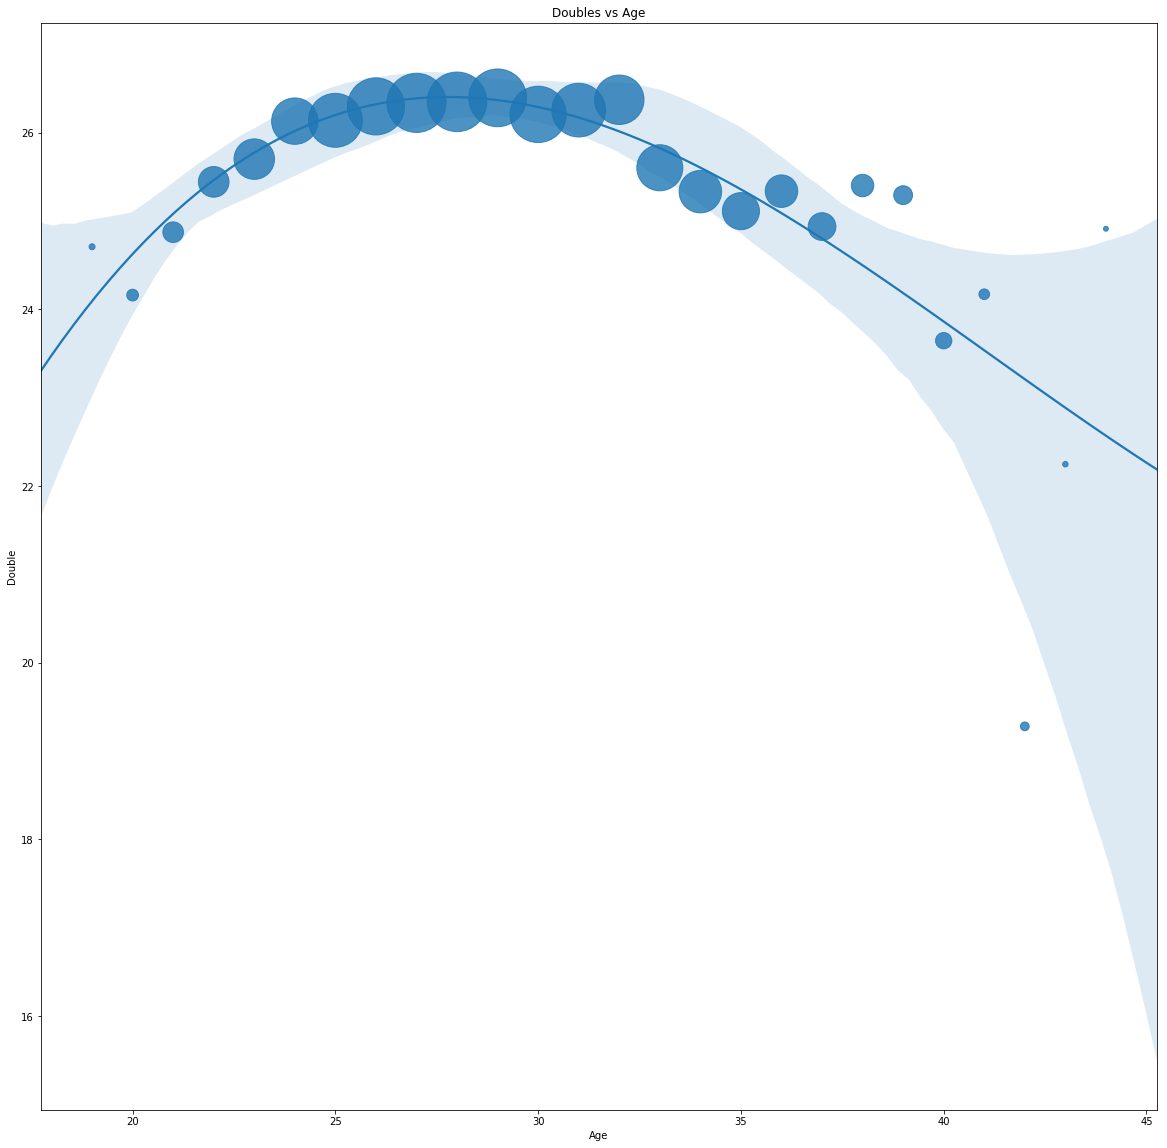

In [168]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x='Age',y='Double', data=agesDF, ax=ax,scatter_kws={"s": 10*agesDF['Count']**(4/5)},order=3)
plt.title('Doubles vs Age')

Text(0.5,1,'Triples vs Age')

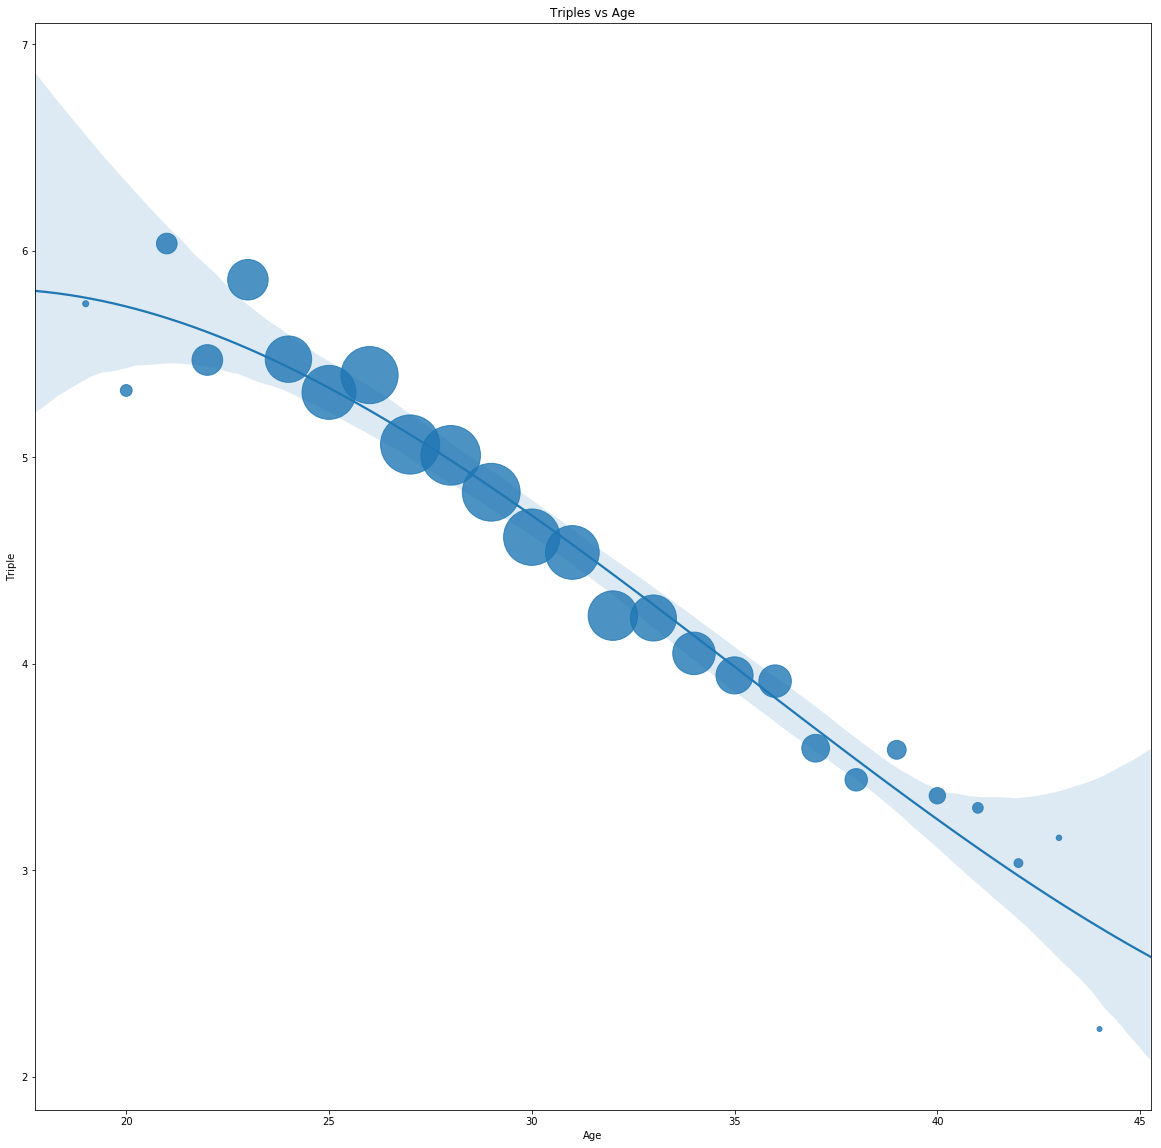

In [167]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x='Age',y='Triple', data=agesDF, ax=ax,scatter_kws={"s": 10*agesDF['Count']**(4/5)},order=3)
plt.title('Triples vs Age')

Text(0.5,1,'HR vs Age')

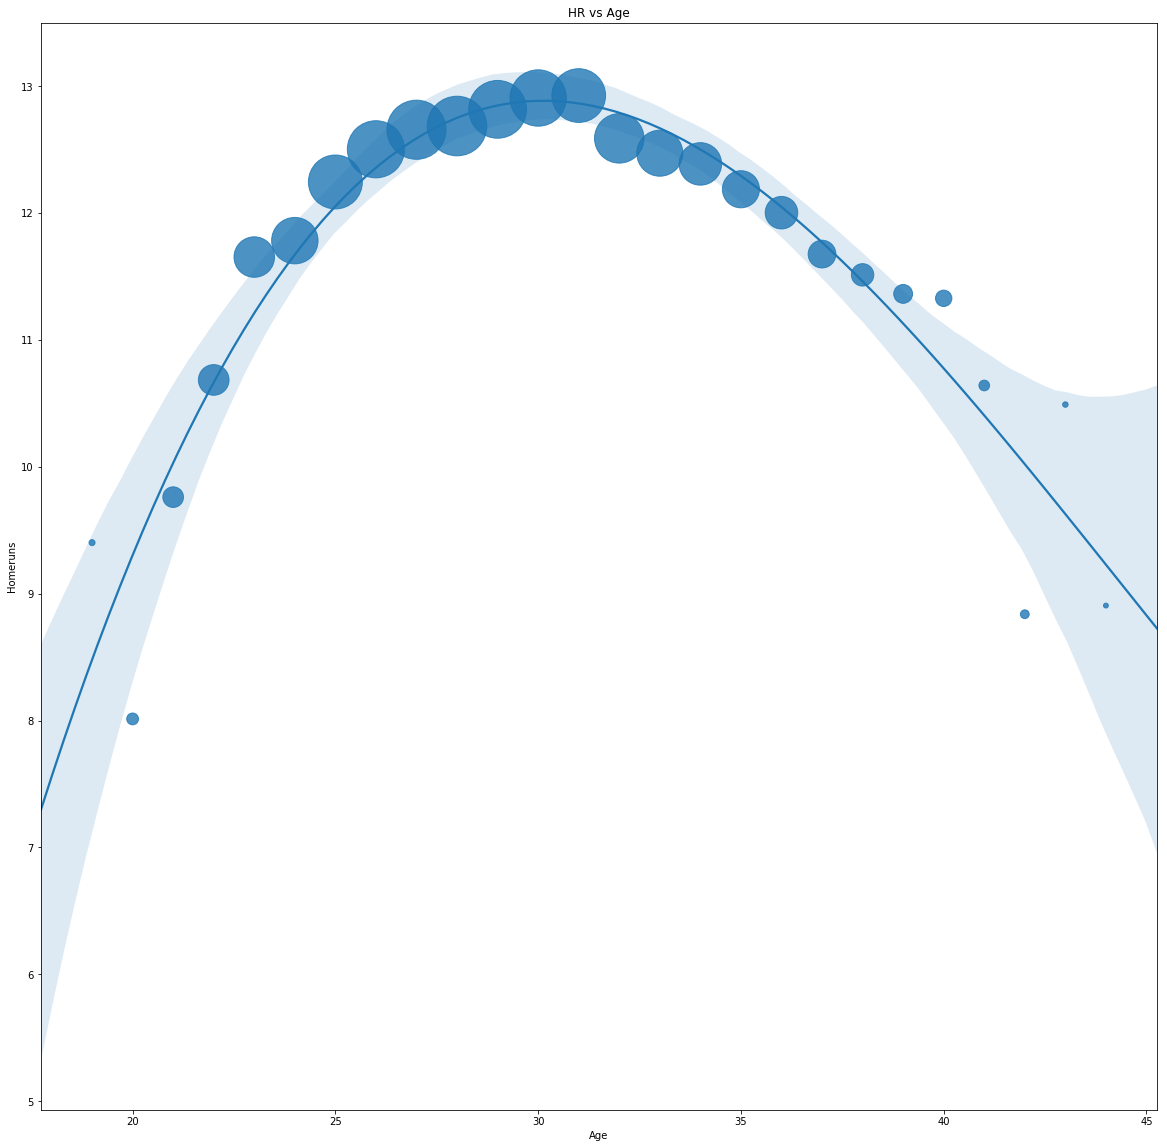

In [165]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x='Age',y='Homeruns', data=agesDF, ax=ax,scatter_kws={"s": 10*agesDF['Count']**(4/5)},order=3)
plt.title('HR vs Age')

Text(0.5,1,'Walks vs Age')

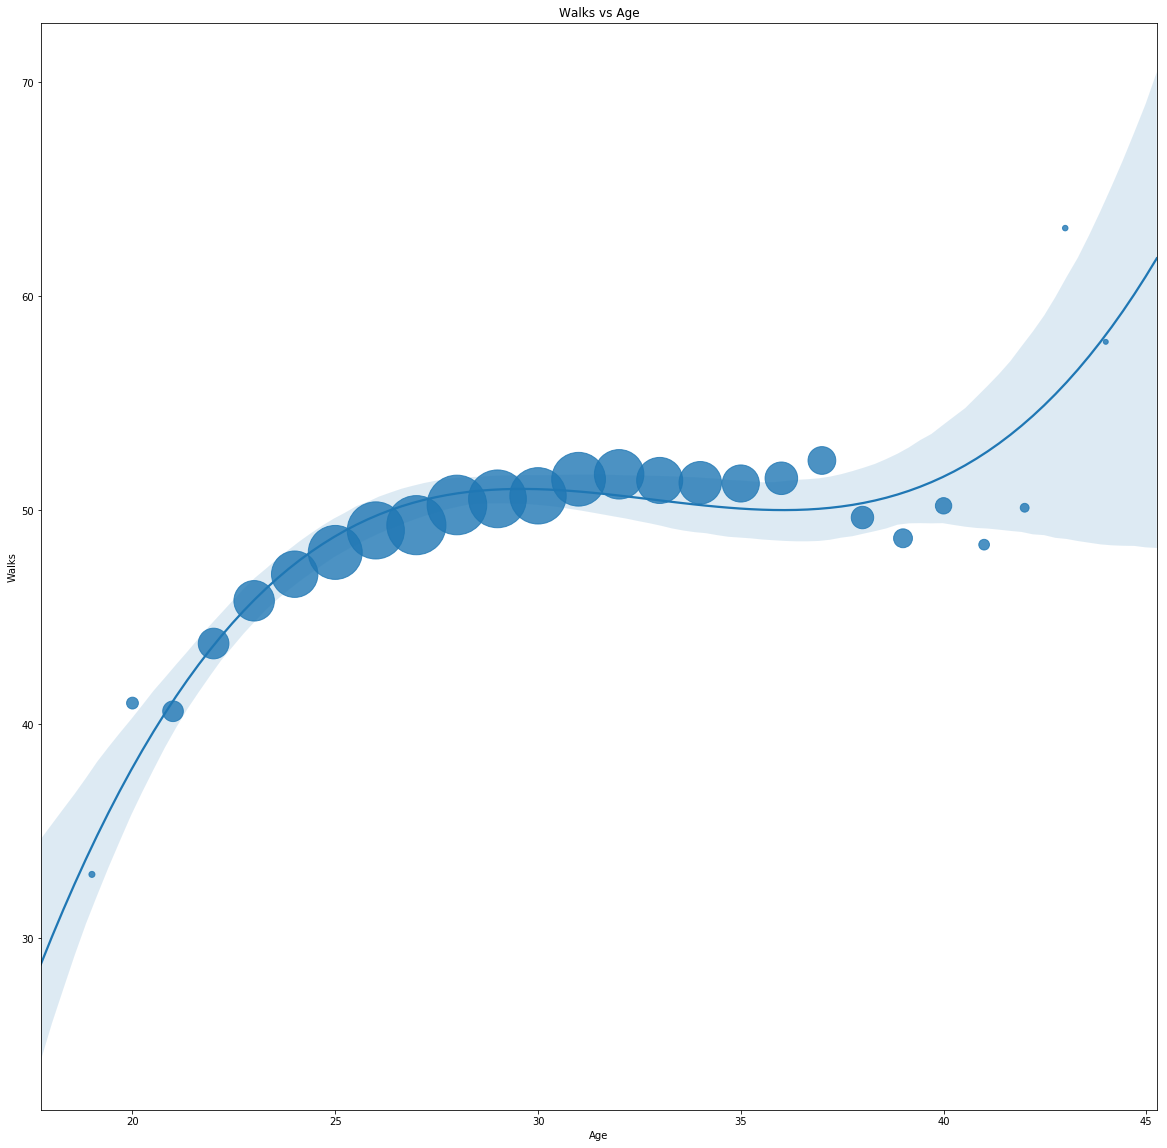

In [166]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x='Age',y='Walks', data=agesDF, ax=ax,scatter_kws={"s": 10*agesDF['Count']**(4/5)},order=3)
plt.title('Walks vs Age')

Text(0.5,1,'Strikeouts vs Age')

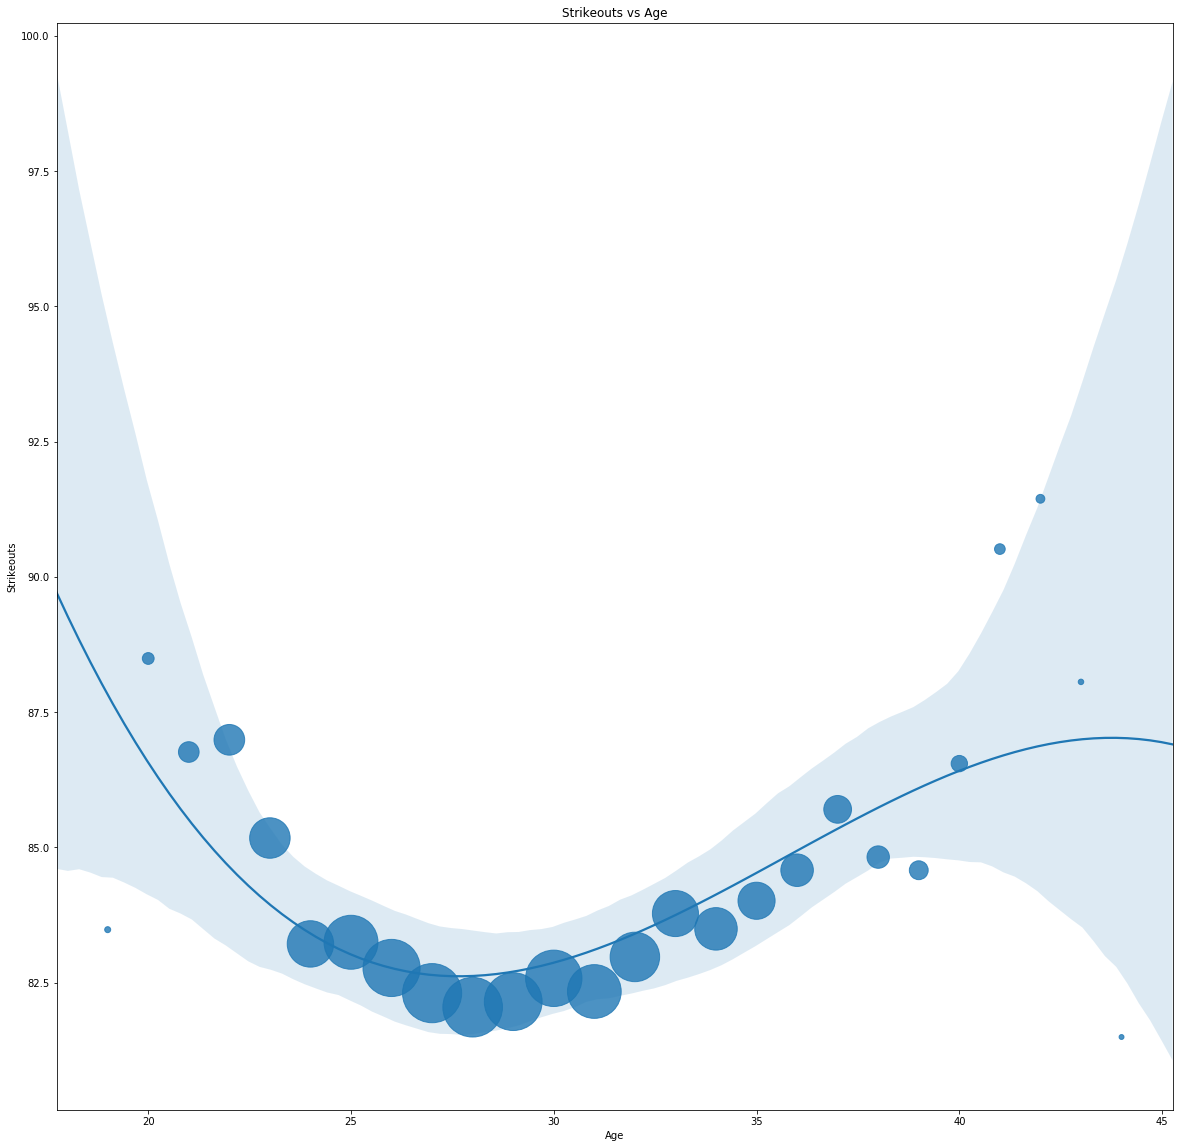

In [162]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x='Age',y='Strikeouts', data=agesDF, ax=ax,scatter_kws={"s": 10*agesDF['Count']**(4/5)},order=3)
plt.title('Strikeouts vs Age')

Text(0.5,1,'SB% vs Age')

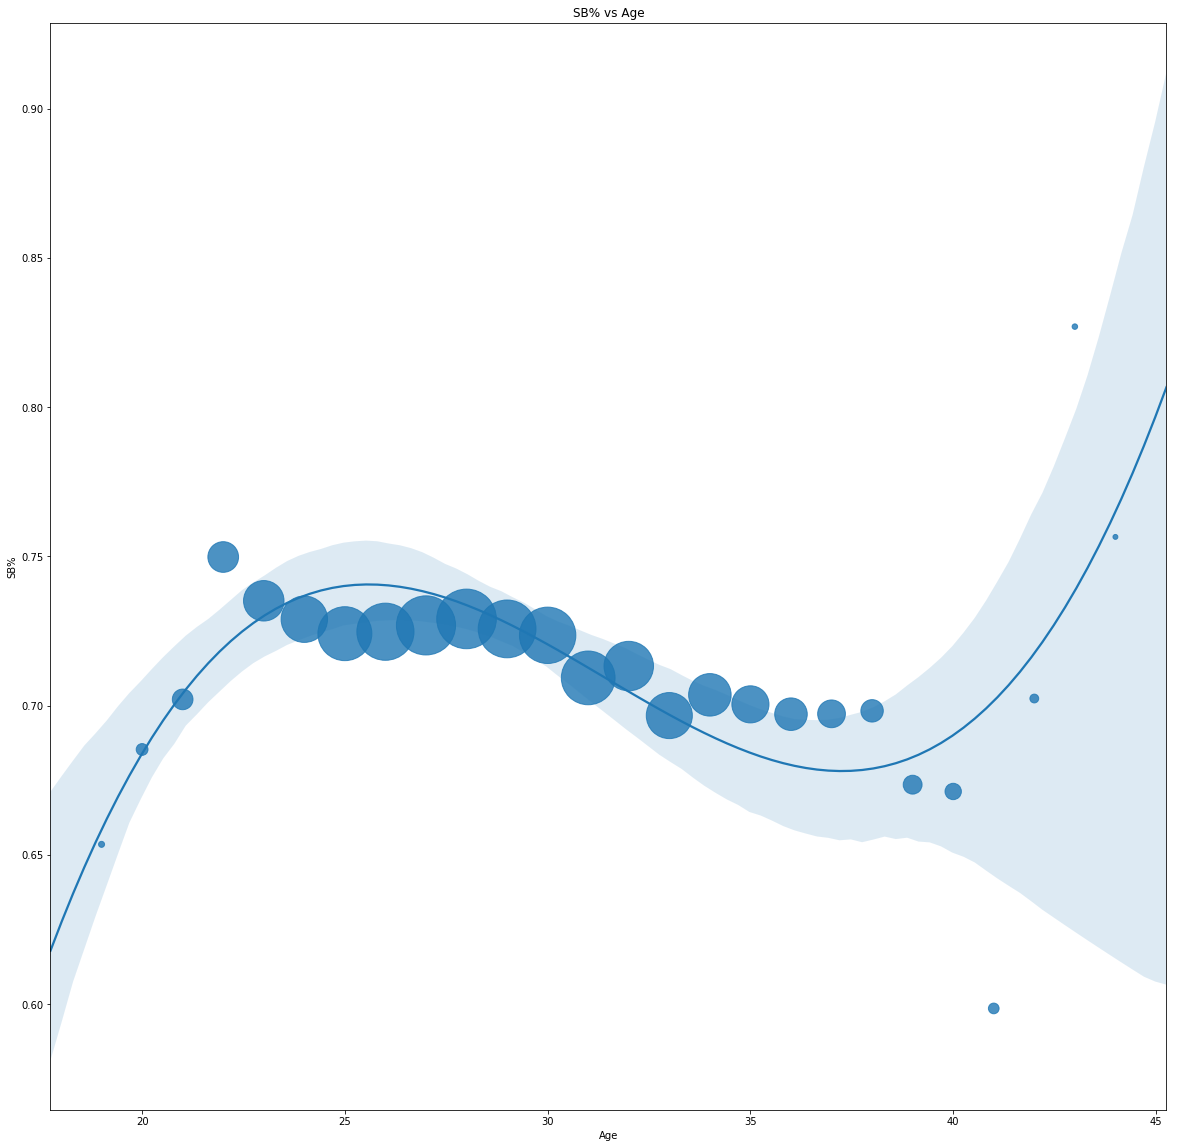

In [164]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x='Age',y='SB%', data=agesDF, ax=ax,scatter_kws={"s": 10*agesDF['Count']**(4/5)},order=3)
plt.title('SB% vs Age')

In [145]:
l = np.polyfit(agesDF['Age'], agesDF['Walks'], 1)
print(f'y = {l[0]}x + {l[1]}')

y = 0.5505199607079446x + 31.807096597474672


In [147]:
l = np.polyfit(agesDF['Age'], agesDF['Walks'], 0)
l

array([49.14847536])